In [123]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from PIL import Image
from scipy.stats import norm
import pandas as pd

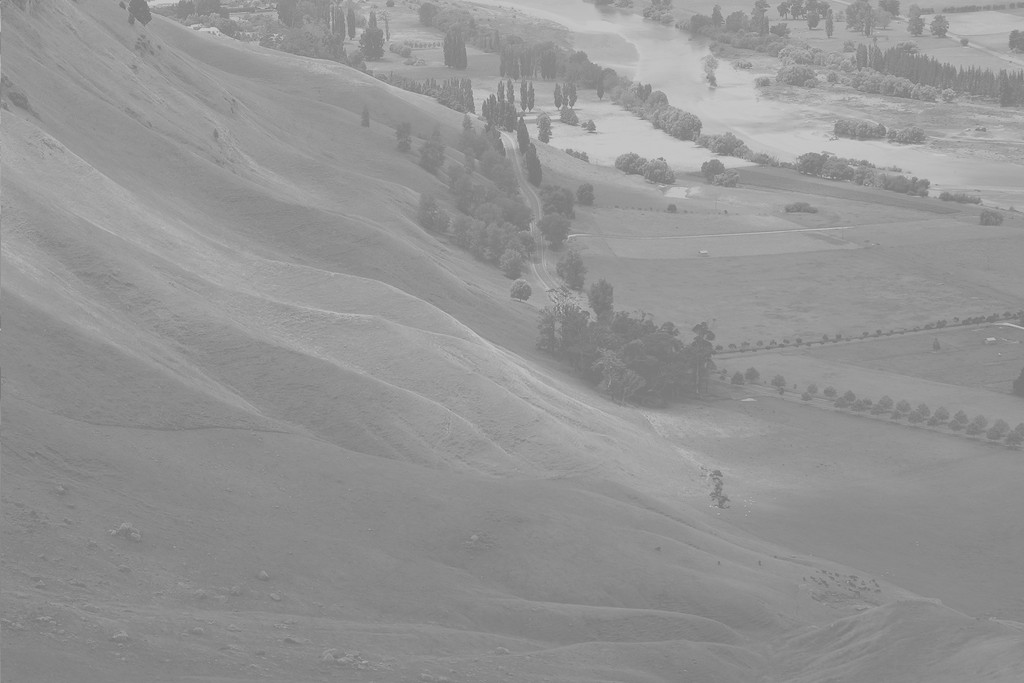

In [58]:
Image.open(r'C:\Users\Гриша\Desktop\landscape.png')

In [37]:
image = plt.imread(r'C:\Users\Гриша\Desktop\landscape.png')
brain = 

In [302]:
def make_histogram(im, *args):
    sp_nums = pd.Series(im.ravel()).value_counts()
    spectr = sp_nums.iloc[np.lexsort([sp_nums.index])]
    cdf = np.cumsum(spectr.values)
    if ('plot' in args) & (len(args) == 1):
        fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize =  ( 10,10))
        ax[0].set_title('hist',fontsize = 15)
        ax[0].grid()
        ax[0].plot(spectr.index,spectr.values)
        ax[1].set_title('cdf',fontsize = 15)
        ax[1].grid()
        ax[1].plot(spectr.index,cdf)
    plt.show()
    return pd.DataFrame(np.array([spectr,cdf]).T, columns = ['hist_values', 'cdf_values'], index = spectr.index)

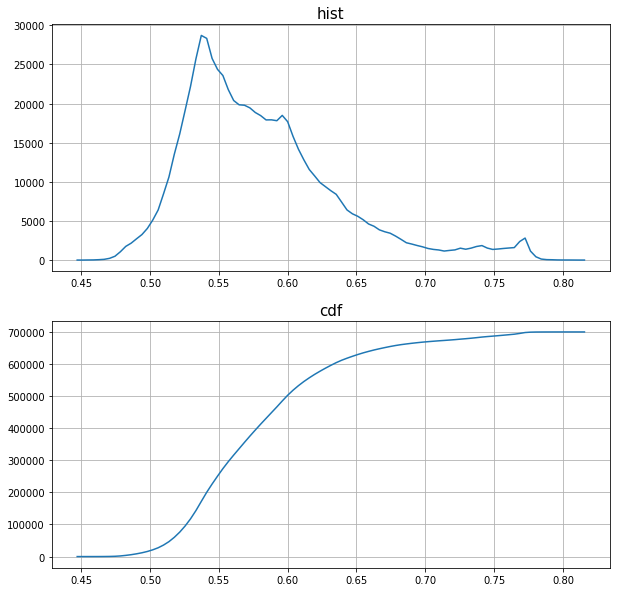

,hist_values,cdf_values
0.447059,1,1
0.450980,1,2
0.454902,12,14
0.458824,19,33
0.462745,49,82
0.466667,93,175
0.470588,220,395
0.474510,488,883
0.478431,1061,1944
0.482353,1747,3691


In [485]:
make_histogram(image,'plot')

## Методы выравнивания гистограммы универсальны, работают с любым  типом канала

In [486]:
def float_alignment_histogram(image):
    image_hist = make_histogram(image)
    min_cdf = image_hist['cdf_values'].iloc[0]
    align_pix_values = image_hist['cdf_values'].apply(lambda x: (x - min_cdf)/(len(image.ravel())-1))
    new_image = np.array(align_pix_values.loc[image.ravel()]).reshape(image.shape)     
    return new_image

In [489]:
def byte_alignment_histogram(image):
    image_hist = make_histogram(image)
    min_cdf = image_hist['cdf_values'].iloc[0]
    align_pix_values = image_hist['cdf_values'].apply(lambda x: round((x - min_cdf)*255/(len(image.ravel())-1)))
    new_image = np.array(align_pix_values.loc[image.ravel()]).reshape(image.shape)     
    return new_image.astype('uint8')

In [487]:
new_image = float_alignment_histogram(image)

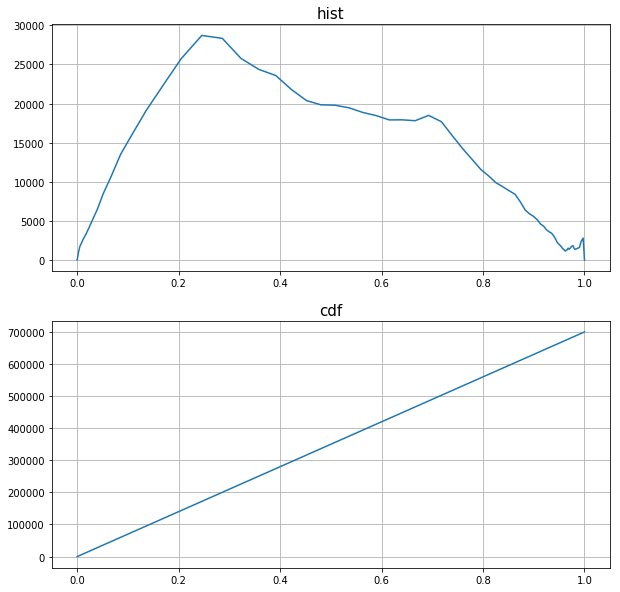

,hist_values,cdf_values
0.000000,1,1
0.000001,1,2
0.000019,12,14
0.000046,19,33
0.000116,49,82
0.000249,93,175
0.000563,220,395
0.001261,488,883
0.002778,1061,1944
0.005276,1747,3691


In [488]:
make_histogram(new_image,'plot')

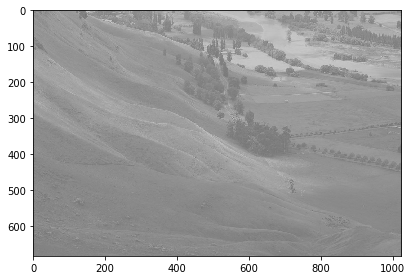

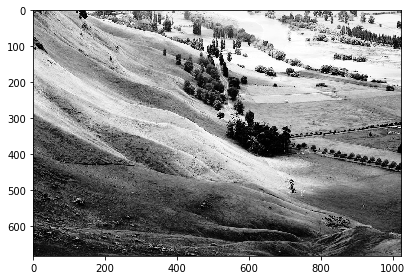

In [372]:
skimage.io.imshow(image)
plt.show()
skimage.io.imshow(new_image/256)
plt.show()

In [481]:
new_p = Image.fromarray(new_image)
if new_p.mode != 'RGB':
    new_p = new_p.convert('RGB')

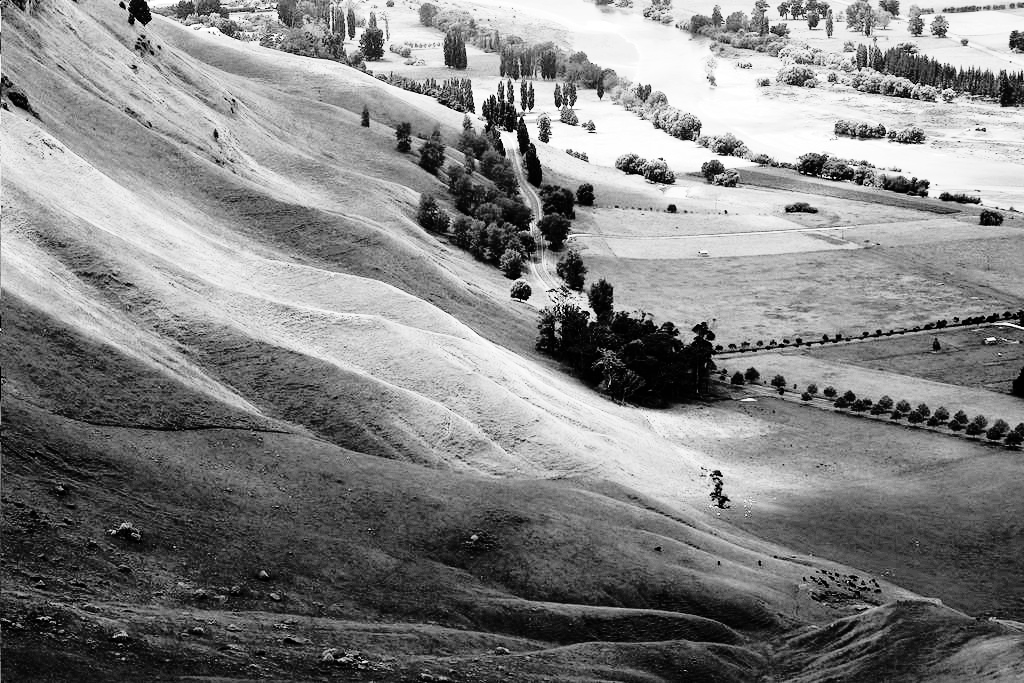

In [482]:
new_p 

False